# **Image Classification**
By Kevin Leonard Sugiman

[GitHub](https://github.com/TGasG)


# **Import Libraries**

In [ ]:
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Tensorflow Version
print(tf.__version__)

2.5.0


# **Dowload Dataset**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-24 16:17:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.84MB/s    in 65s     

2021-06-24 16:19:03 (4.70 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Extract zip file
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import pathlib
data_dir = '/tmp/rockpaperscissors/rps-cv-images'
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2188


Rock image sample

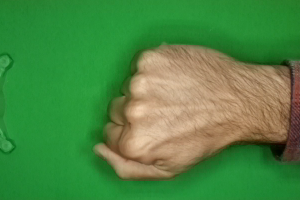

In [ ]:
rock = list(data_dir.glob('rock/*'))
PIL.Image.open(str(rock[0]))

Paper image sample

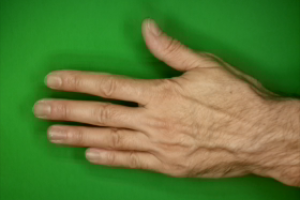

In [ ]:
paper = list(data_dir.glob('paper/*'))
PIL.Image.open(str(paper[0]))

Scissor image sample

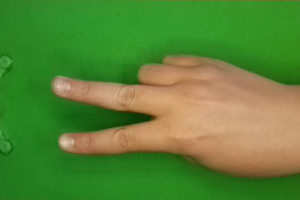

In [ ]:
scissors = list(data_dir.glob('scissors/*'))
PIL.Image.open(str(scissors[0]))

# **Load data with keras.preprocessing**

Define loader parameter

In [ ]:
batch_size = 32
img_height = 200
img_width = 200

Divide 60% dataset for training

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale'
  )

Found 2188 files belonging to 3 classes.
Using 1313 files for training.


Divide 40% dataset for validation

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale'
  )

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


# **Check classess**

In [ ]:
class_names = train_ds.class_names
print(class_names)

['paper', 'rock', 'scissors']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 1)
(32,)


# **Train model**

In [ ]:
num_classes = 3
model = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
42/42 [==============================] - 37s 126ms/step - loss: 1.1037 - accuracy: 0.3420 - val_loss: 1.0951 - val_accuracy: 0.3417
Epoch 2/15
42/42 [==============================] - 5s 113ms/step - loss: 0.9649 - accuracy: 0.5529 - val_loss: 1.7386 - val_accuracy: 0.4389
Epoch 3/15
42/42 [==============================] - 5s 112ms/step - loss: 0.6356 - accuracy: 0.7654 - val_loss: 0.4703 - val_accuracy: 0.8320
Epoch 4/15
42/42 [==============================] - 5s 112ms/step - loss: 0.3881 - accuracy: 0.8431 - val_loss: 0.3952 - val_accuracy: 0.8423
Epoch 5/15
42/42 [==============================] - 5s 112ms/step - loss: 0.2821 - accuracy: 0.8957 - val_loss: 0.2969 - val_accuracy: 0.8834
Epoch 6/15
42/42 [==============================] - 5s 113ms/step - loss: 0.1809 - accuracy: 0.9414 - val_loss: 0.1988 - val_accuracy: 0.9314
Epoch 7/15
42/42 [==============================] - 5s 112ms/step - loss: 0.1241 - accuracy: 0.9558 - val_loss: 0.1644 - val_accuracy: 0.9509
Epoch

# **Image Prediction**

Saving scissors.jpg to scissors.jpg
scissors.jpg
This picture is scissors with 99.99 % probability.


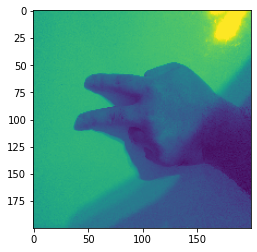

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  image = tf.keras.preprocessing.image.load_img(
    path, color_mode='grayscale', target_size=(200, 200),
    interpolation='nearest'
    )
  imgplot = plt.imshow(image)
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])
  print(fn)

predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(
    "This picture is {} with {:.2f} % probability."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
    )